Nama  : Tugiyanto <br>
NIM   : 211351146 <br>
Kelas : Malam B <br>

# import Dataset

disini saya akan menkoneksikan google colab menggunakan token dari akun saya :

In [51]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tugiyanto","key":"a98e2577e5145007cc825f23c901c888"}'}

In [52]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [53]:
!kaggle datasets download fedesoriano/hepatitis-c-dataset

100% 14.8k/14.8k [00:00<00:00, 149kB/s]
100% 14.8k/14.8k [00:00<00:00, 148kB/s]


In [54]:
!mkdir hepatitis-c-dataset
!unzip hepatitis-c-dataset -d hepatitis-c-dataset
!ls hepatitis-c-dataset

Archive:  hepatitis-c-dataset.zip
  inflating: hepatitis-c-dataset/HepatitisCdata.csv  
HepatitisCdata.csv


# import library yang digunakan

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from google.colab import files
import pickle

# Data Discovery

In [56]:
df = pd.read_csv('/content/hepatitis-c-dataset/HepatitisCdata.csv')

In [57]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [59]:
df.shape

(615, 14)

In [60]:
df['Category'].value_counts()

0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64

In [61]:
df = df.drop(['Unnamed: 0'],axis=1)

In [62]:
df.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [63]:
df['ALB'].fillna(df['ALB'].mean(), inplace=True)
df['ALP'].fillna(df['ALP'].mean(), inplace=True)
df['CHOL'].fillna(df['CHOL'].mean(), inplace=True)
df['PROT'].fillna(df['PROT'].mean(), inplace=True)
df['ALT'].fillna(df['ALT'].mean(), inplace=True)

In [64]:
df.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

# EDA

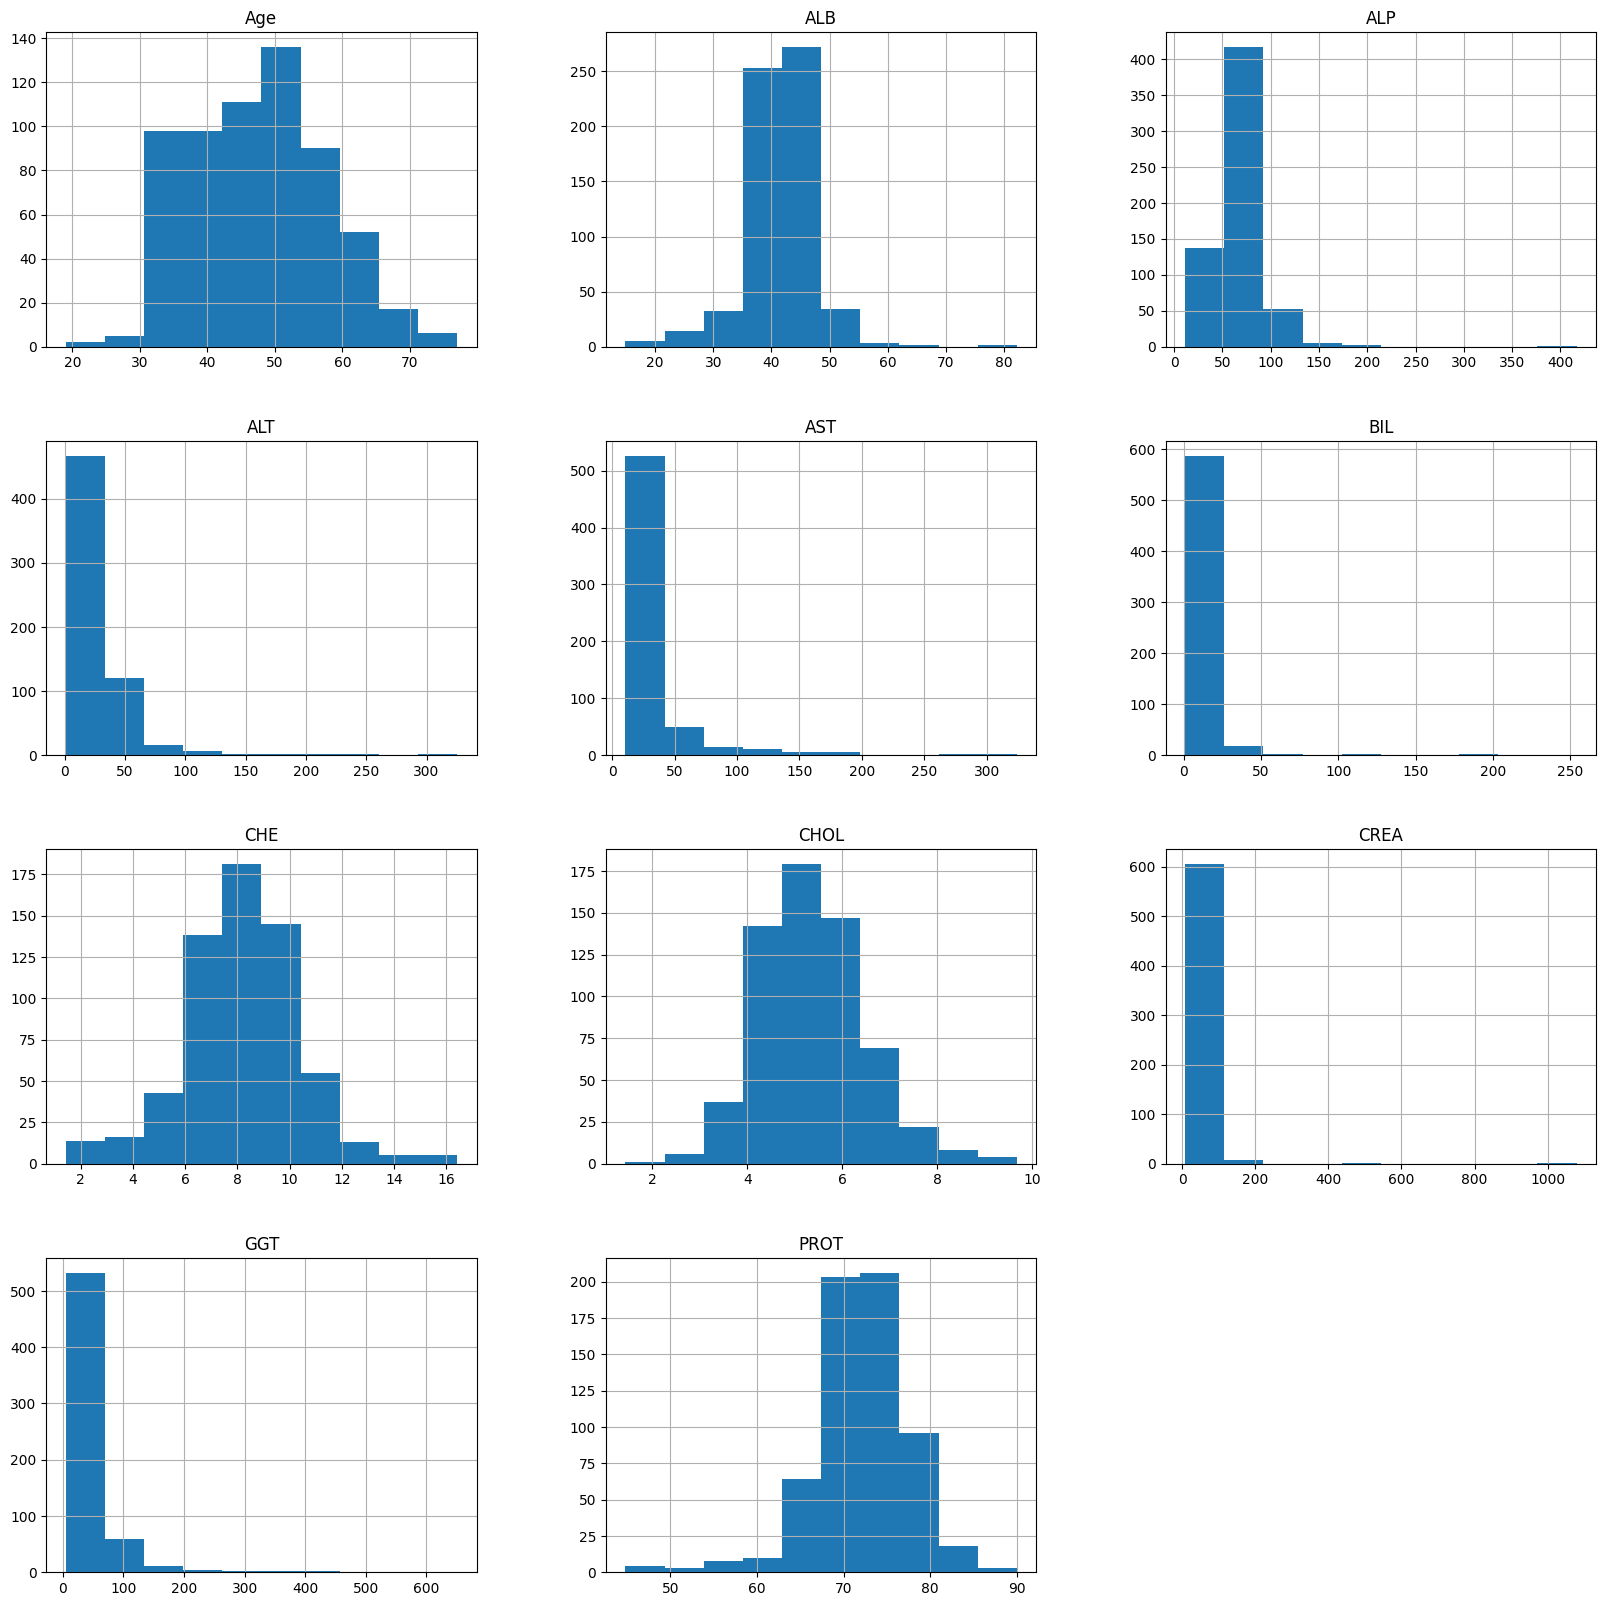

In [65]:
p = df.hist(figsize = (20,20))

*Grafik diatas digunakan untuk memperhitungkan nilai kolom sesuai dengan distribusinya.*
*Distribusi yang condong ke kiri adalah distribusi yang negatif sedangkan distribusi yang condong ke kanan adalah distribusi positif*

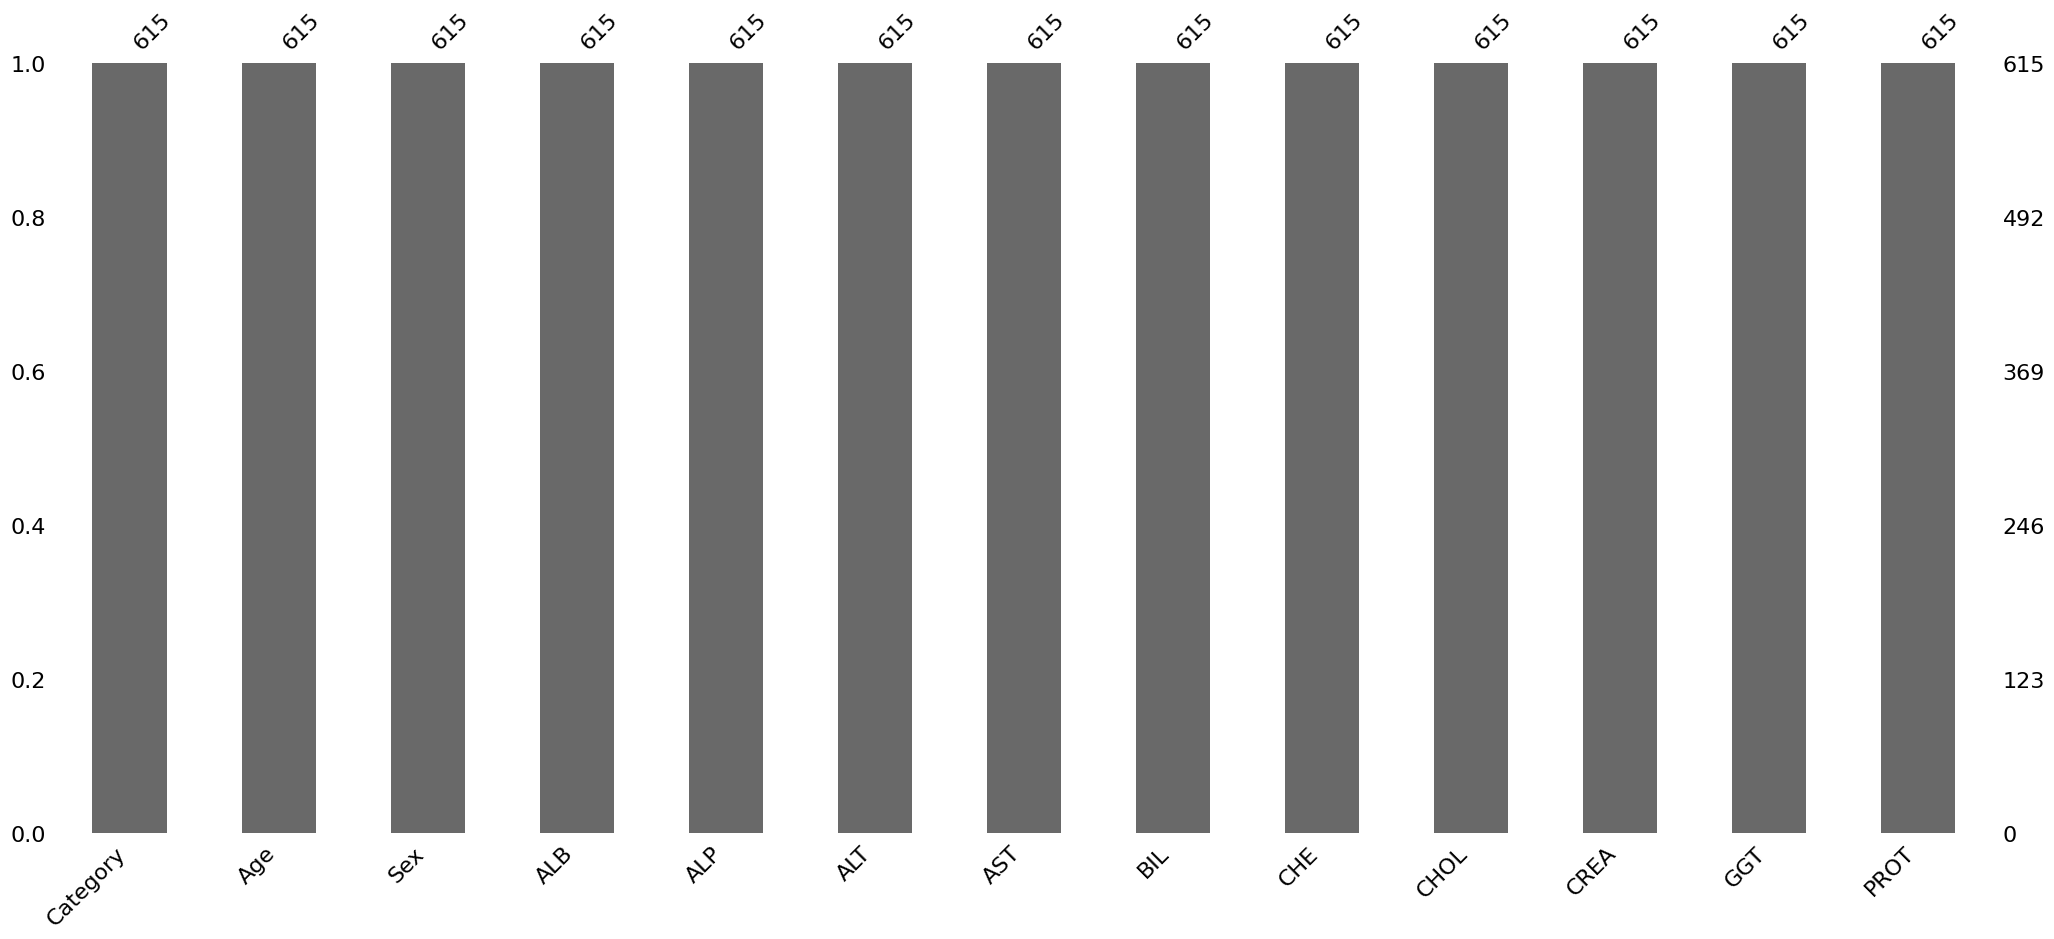

In [66]:
p=msno.bar(df)

*Grafik di atas menujukan jumlah isi baris dan kolom dari data.*

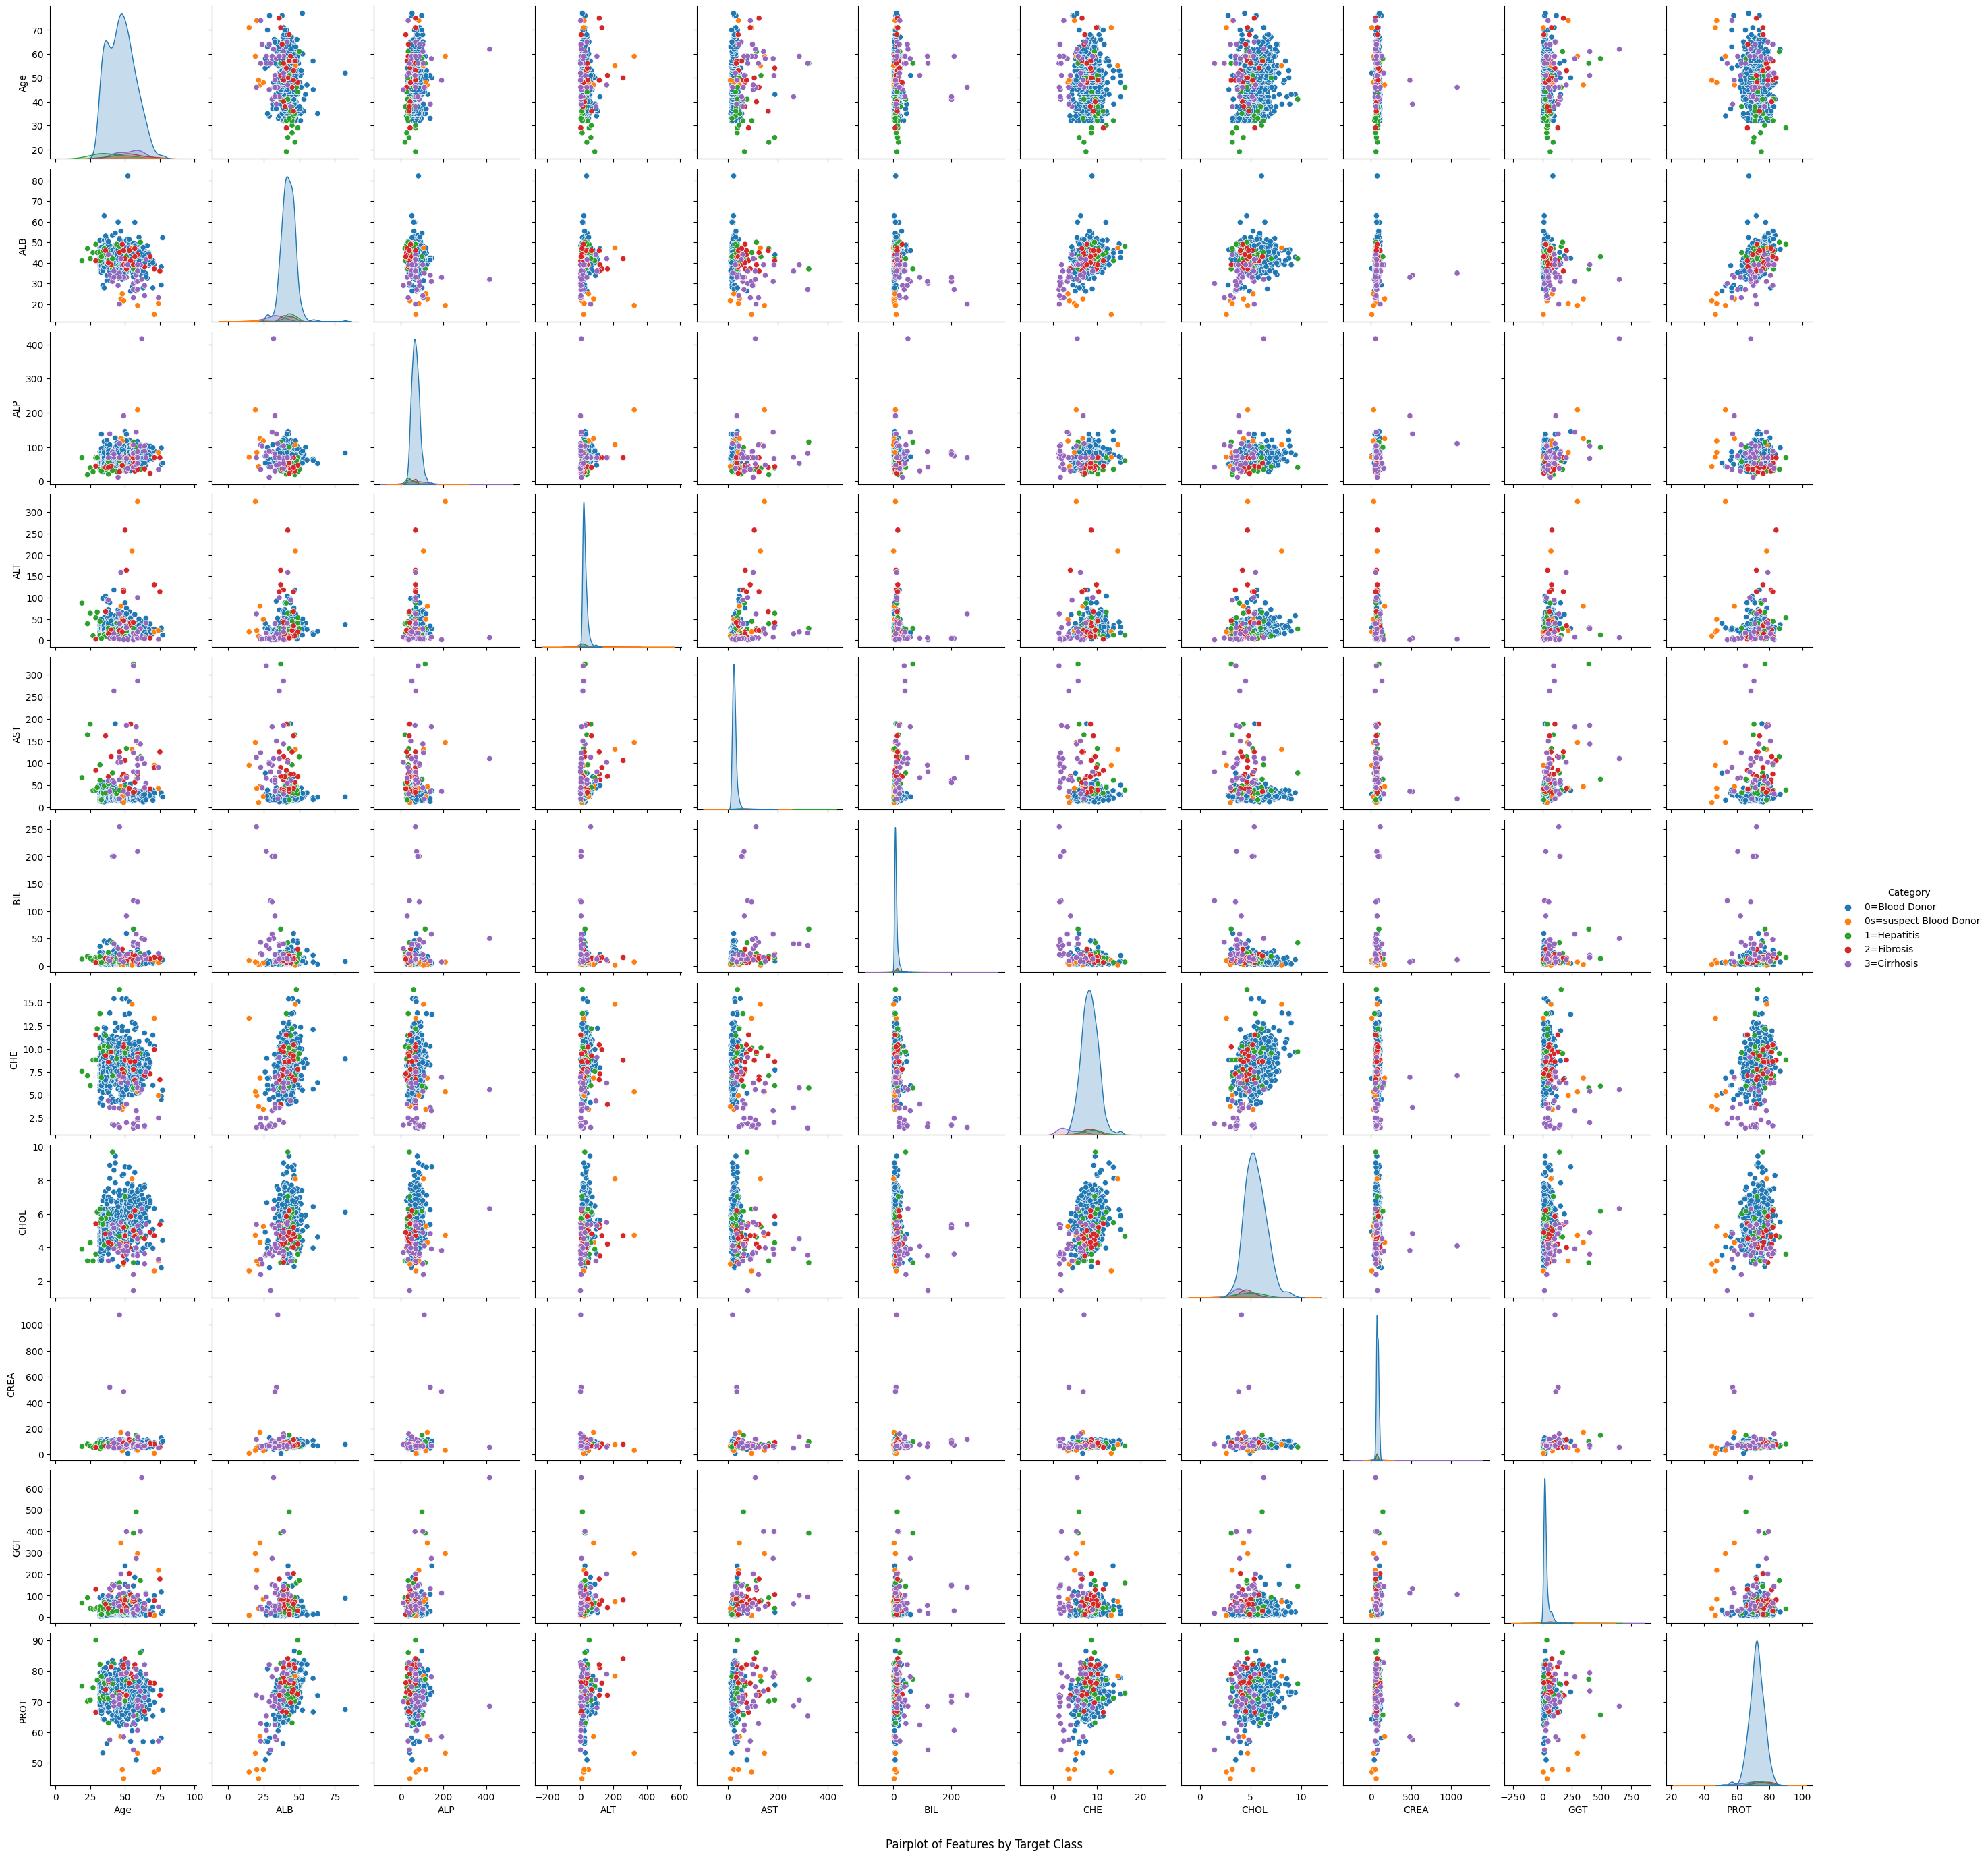

In [67]:
sns.pairplot(df, hue='Category')
plt.suptitle("Pairplot of Features by Target Class", y=0)
plt.show()

*dari data ditas terdapat Korelasi Pearson bisa berkisar antara -1 sampai +1. 1 berarti berkorelasi tinggi dan 0 berarti tidak ada korelasi*.

<ipython-input-68-dd0d4eff6b7c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


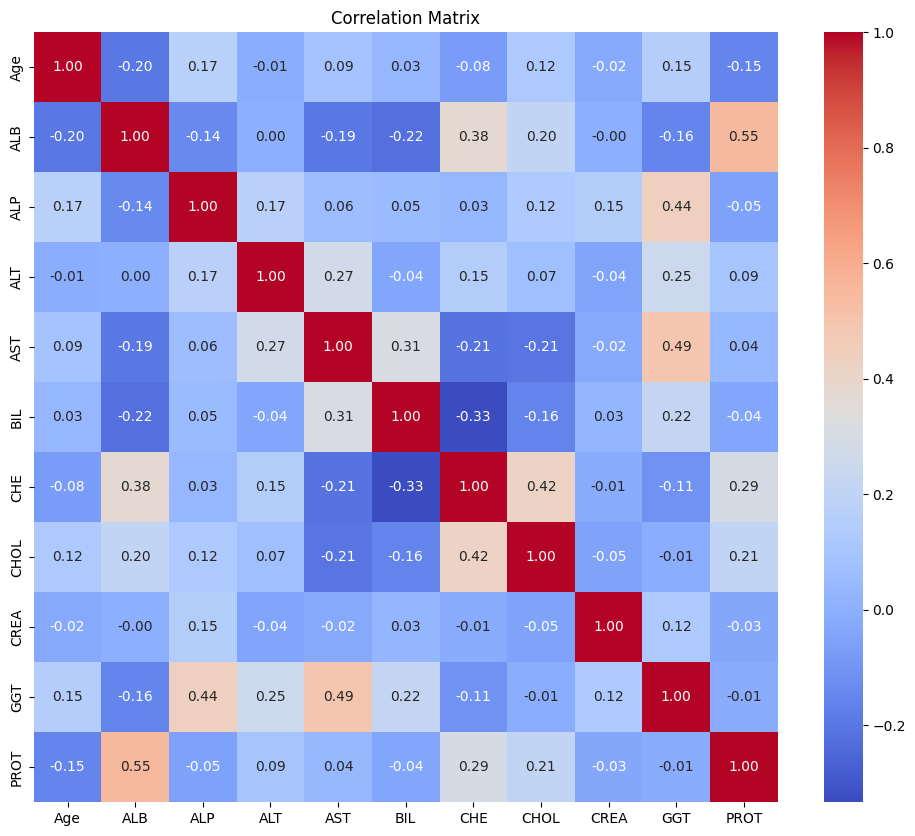

In [68]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

*Korelasi matriks diatas menunjukan hubungan linier antara pasangan variabel. Nilai berkisar dari -1 hingga 1, di mana 1 menunjukkan hubungan linier positif sempurna,sedangkan -1 menunjukkan hubungan linier negatif sempurna, dan 0 menunjukkan tidak ada hubungan linier.*

Text(0.5, 0, 'Category')

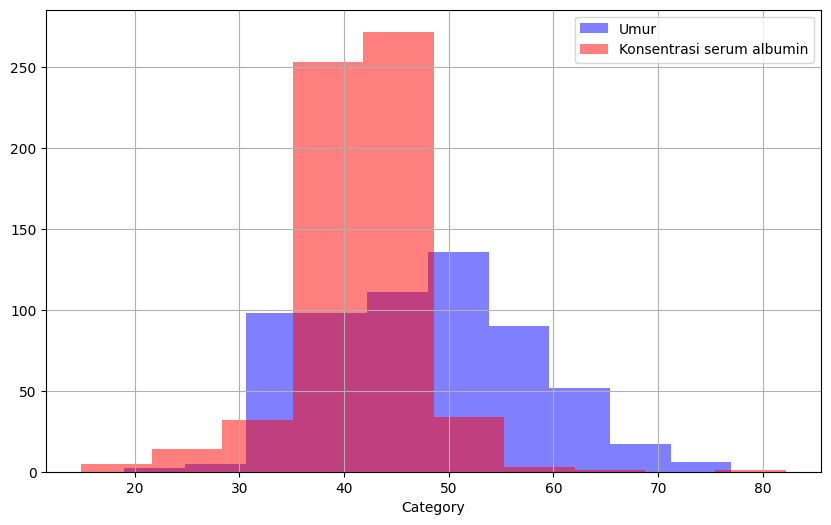

In [69]:
plt.figure(figsize=(10,6))
df['Age'].hist(alpha=0.5,color='blue',label='Umur')
df['ALB'].hist(alpha=0.5,color='red',label='Konsentrasi serum albumin')
plt.legend()
plt.xlabel('Category')

# Preprocessing

In [70]:
df['Category'] = df['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0,
                                     "1=Hepatitis" : 1, "2=Fibrosis" : 1, "3=Cirrhosis" : 1})

In [71]:
numerical = []
catgcols = []

for col in df.columns:
  if df[col].dtype=="float64":
    numerical.append(col)
  else:
    catgcols.append(col)

for col in df.columns:
  if col in numerical:
    df[col].fillna(df[col].median(), inplace=True)
  else:
    df[col].fillna(df[col].mode(), inplace=True)

In [72]:
numerical

['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

In [73]:
catgcols

['Category', 'Age', 'Sex']

In [74]:
df['Category'].value_counts()

0    540
1     75
Name: Category, dtype: int64

In [75]:
ind_col = [col for col in df.columns if col != 'Category']
dep_col = 'Category'

In [76]:
df[dep_col].value_counts()

0    540
1     75
Name: Category, dtype: int64

*Transforms Data*

In [77]:
le = LabelEncoder()

for col in catgcols:
  df[col] = le.fit_transform(df[col])

In [78]:
le = LabelEncoder()

for col in catgcols:
  df[col] = le.fit_transform(df[col])

In [79]:
df['Category'] = le.fit_transform(df['Category'])

In [80]:
x = df[ind_col]
y = df[dep_col]

In [81]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,6,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,6,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,6,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,6,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,6,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    int64  
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    int64  
 3   ALB       615 non-null    float64
 4   ALP       615 non-null    float64
 5   ALT       615 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      615 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      615 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 62.6 KB


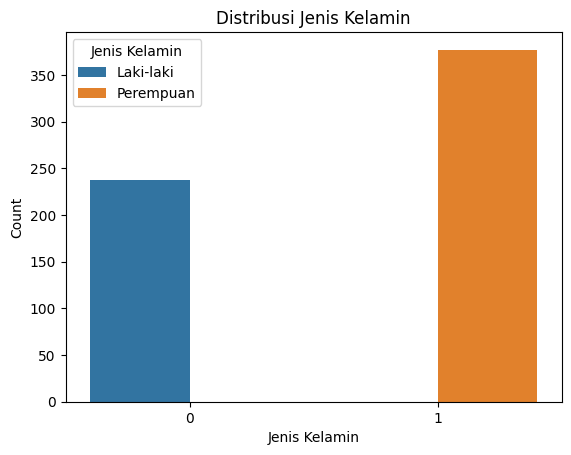

In [83]:
sns.countplot(x='Sex', data=df, hue='Sex')

plt.title('Distribusi Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Count')

plt.legend(title='Jenis Kelamin', labels=['Laki-laki', 'Perempuan'])

plt.show()

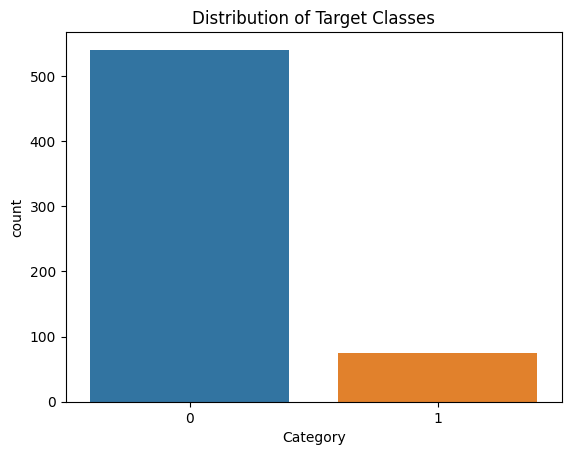

In [84]:
sns.countplot(x='Category', data=df)
plt.title("Distribution of Target Classes")
plt.show()

*Grafik di atas menunjukkan bahwa data bias terhadap titik data yang memiliki nilai hasil 0 yang berarti sebenarnya tidak ada Hepatitis. Jumlah penderita non-Hepatitis hampir empat kali lipat jumlah penderita hepatitis*

# modeling

In [85]:
X = df.drop("Category",axis = 1)
y = df.Category

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [87]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)

    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [88]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [89]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 95.13513513513514 % and k = [3, 5, 7]


In [90]:
knn = KNeighborsClassifier(1)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9351351351351351

# Visualisasi hasil algoritma

Text(0.5, 23.52222222222222, 'Predicted label')

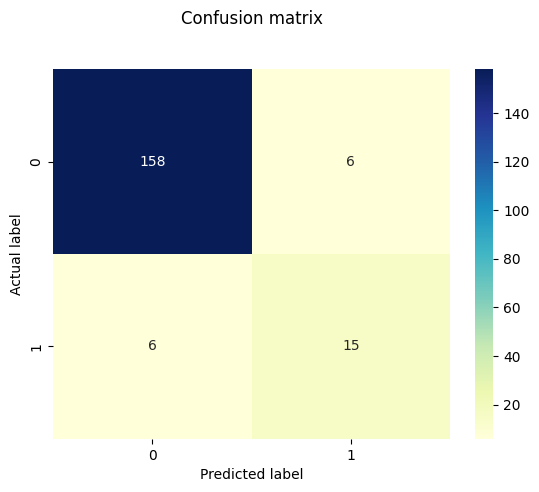

In [91]:
y_pred = knn.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       164
           1       0.71      0.71      0.71        21

    accuracy                           0.94       185
   macro avg       0.84      0.84      0.84       185
weighted avg       0.94      0.94      0.94       185



*model ini memiliki kinerja yang baik, dengan nilai tinggi untuk precision, recall, dan F1-score, serta akurasi yang mencapai 94%. Namun, interpretasi yang lebih mendalam bisa dilakukan berdasarkan kebutuhan dan karakteristik khusus dari masalah klasifikasi yang dihadapi.Dari seluruh data yang ada, berapa yang kami beri label? Penarikan kembali lebih besar dari 0,5 dan itu hasilnya cukup bagus.*


In [93]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,6,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,6,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,6,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,6,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,6,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [94]:
df.shape

(615, 13)

In [95]:
input_data = (4, 1, 38.5, 52.5, 7.7, 22.1, 7.5, 6.93, 3.23, 106.0, 12.1, 69.0)

input_data_as_numpy_array = np.array(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = knn.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print('Pasien Tidak Terkena Hepatitits')
else:
  print('Pasien Terkena Hepatitis')

[0]
Pasien Tidak Terkena Hepatitits


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# save model (pickle)

In [96]:
filename = 'prediksi_hepatitis.sav'
pickle.dump(knn,open(filename,'wb'))